# Exercise 7 - Hannafalch_nastby

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.integrate import trapz

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Text(0.5, 1.0, 'features 2 & 3')

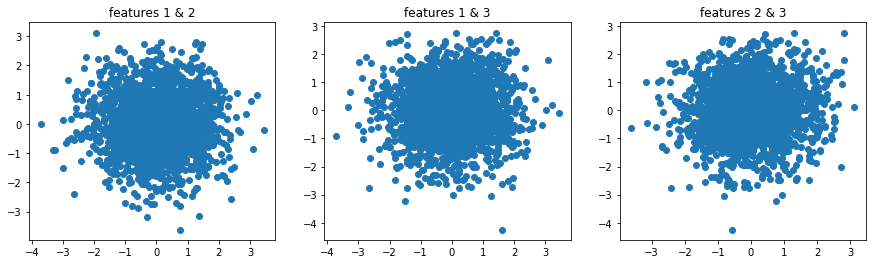

In [2]:
df = pd.read_csv("Data/regression_generated.csv",sep = ',')

#plt.scatter(df['features_1'], df['features_2'])
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(df['features_1'], df['features_2'])
ax1.set_title("features 1 & 2")
ax2.scatter(df['features_1'], df['features_3'])
ax2.set_title("features 1 & 3")
ax3.scatter(df['features_2'], df['features_3'])
ax3.set_title("features 2 & 3")

There is no apparent correlation between the plots, as there is no visible pattern.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


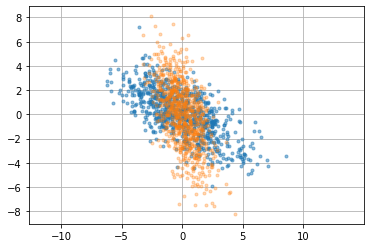

In [3]:
def datasetCreate(mu, sigma, num_samples):
    x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    d = np.sqrt(x*x+y*y)

    g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    
    return g

cov1 = np.array([[6, -3], [-3, 3.5]])
pts1 = np.random.multivariate_normal([0, 0], cov1, size=800)

cov2 = np.array([[1, 0], [-2, 7]])
pts2 = np.random.multivariate_normal([0, 0], cov2, size=800)

plt.plot(pts1[:, 0], pts1[:, 1], '.', alpha=0.5)
plt.plot(pts2[:, 0], pts2[:, 1], '.', alpha=0.3)
plt.axis('equal')
plt.grid()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

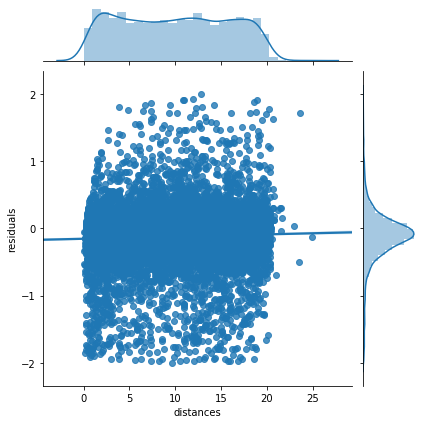

In [42]:
dfResiduals = pd.read_pickle('Data/residuals_261.pkl')
dfContent = pd.DataFrame(dfResiduals.item())

dfContent = dfContent.drop(dfContent[abs(dfContent.residuals) >= 2].index)


sns.jointplot(data=dfContent, x="distances", y="residuals",kind = "reg")

[ 1.25  3.75  6.25  8.75 11.25 13.75 16.25 18.75]
[-0.16209792754311064, -0.13453115520958248, -0.09437151580031976, -0.0728359708071407, -0.0994930525401627, -0.14134470218955486, -0.14316205604783885, -0.047012114845945516]
[0.4133457442504932, 0.4137023414656768, 0.4434217198579661, 0.4403652040922353, 0.4773371656575189, 0.4664345637329531, 0.40863153896981785, 0.4075713374639707]


<ErrorbarContainer object of 3 artists>

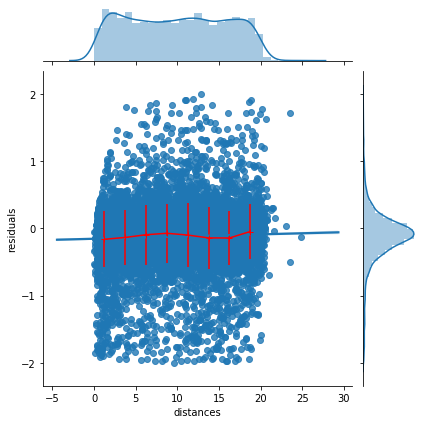

In [53]:
xBorder = np.linspace(0,20,9)
x = (xBorder[1:] + xBorder[:-1])/2 #(min + max ) / 2
print(x)
resDig = np.digitize(dfContent['distances'], x)
y = [dfContent["residuals"][resDig == i].mean() for i in range(1, len(xBorder))]
print(y)

err_y = [dfContent['residuals'][resDig == i].std() for i in range(1, len(xBorder))]
print(err_y)

sns.jointplot(data=dfContent, x="distances", y="residuals",kind = "reg")
plt.errorbar(x, y , yerr = err_y, marker = '+', color = 'red')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.



In [104]:
sigma = 0.3
mu = 0.6
x = np.random.normal(sigma, mu,size=1000)
#x = norm.rvs(sigma, mu, size=1000)

Text(0.5, 1.0, 'New distribution')

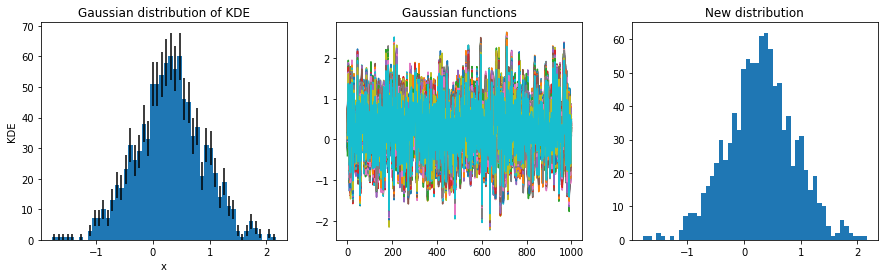

In [192]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))# create the figure and the axes
count, bins, ignored = ax1.hist(x, 50)

bincenters = 0.5*(bins[1:]+bins[:-1])
menStd     = np.sqrt(count)
width      = 0.05

stdDef = 1.06 * x.std() * (1000**(-1/5))
def gausCreate(x, std = stdDef):

    gList = []
    for i in x:
        gauss = norm.rvs(i, std, 1000)
        gList.append(gauss)
    #print(gList)
    return gList


g = gausCreate(x)
traps = trapz(g)/1000


ax1.bar(bincenters, count, width=width, yerr=menStd)
#ax1 = fig.axes[0]
ax1.set_title('Gaussian distribution of KDE')
ax1.set_xlabel('x')
ax1.set_ylabel('KDE')

ax2.plot(g)
ax2.set_title('Gaussian functions')

ax3.hist(traps, 50)
ax3.set_title('New distribution')
#fig.tight_layout()
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')